In [433]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

In [434]:

X = np.array([1, 2, 3, 4, 5 ])
np.random.seed(2017)
y = X * 2 + np.random.randn(len(X))

Text(0, 0.5, 'y')

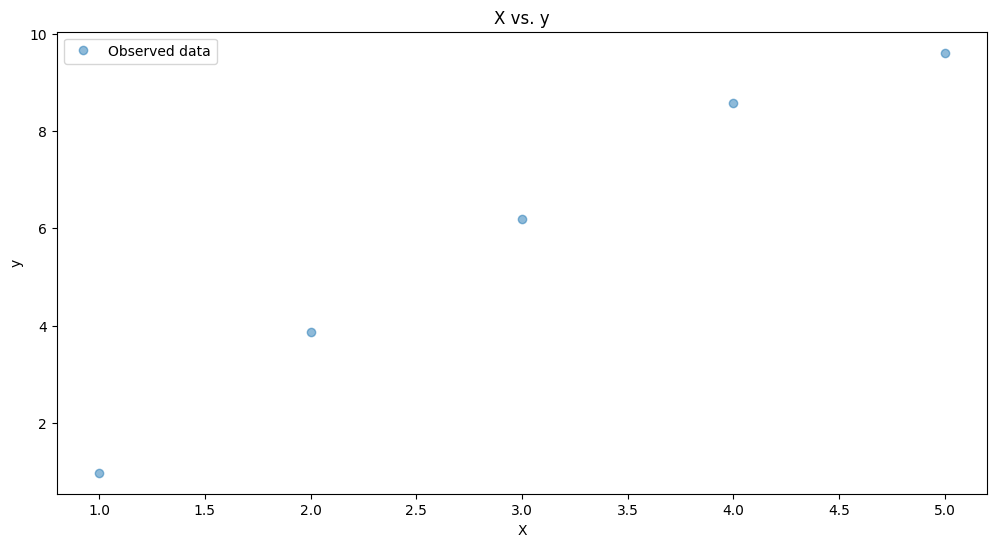

In [435]:

plt.figure(figsize=(12, 6))
plt.plot(X, y, 'o', alpha=0.5, label='Observed data')
# plt.plot(X, y)
plt.legend()
plt.title('X vs. y')
plt.xlabel('X')
plt.ylabel('y')

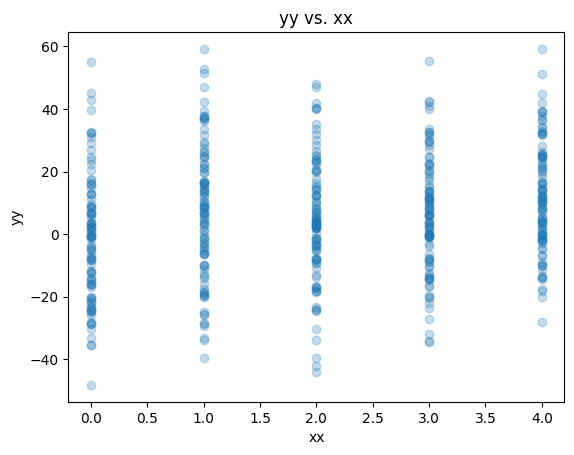

In [444]:
nn = 100
xx, yy = [], []
noise = 20
# noise = 0.2
for ix in np.arange(len(X)):
    for jx in np.arange(nn):
        xx.append(ix)
        yy.append(y[ix] + np.random.normal(0,noise))
# xx
# yy
plt.title('yy vs. xx')
plt.xlabel('xx')
plt.ylabel('yy')
plt.plot(xx, yy, 'o', alpha=0.25)


In [445]:
with pm.Model() as model:
    intercept = pm.Normal("intercept", 0, 3)
    slope = pm.Normal("slope", 0, 1)
    error = pm.HalfCauchy("error", 1)
    mean = intercept + slope * xx   # <======= Bayesian Likelihood function, eg. a starter guess on how these variables work together
    obs = pm.Normal("obs", mean, error, observed=yy)

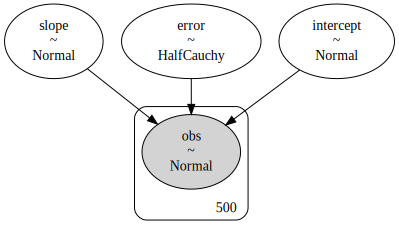

In [446]:
pm.model_to_graphviz(model)

In [447]:
# def my_callback(trace, draw):
#     if len(trace) >= 100:
#         raise KeyboardInterrupt()


# with model:
#     trace = pm.sample(tune=0, draws=500, callback=my_callback, chains=1)

# print(len(trace))

In [448]:
with model:
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [intercept, slope, error]


Output()

Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 9 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


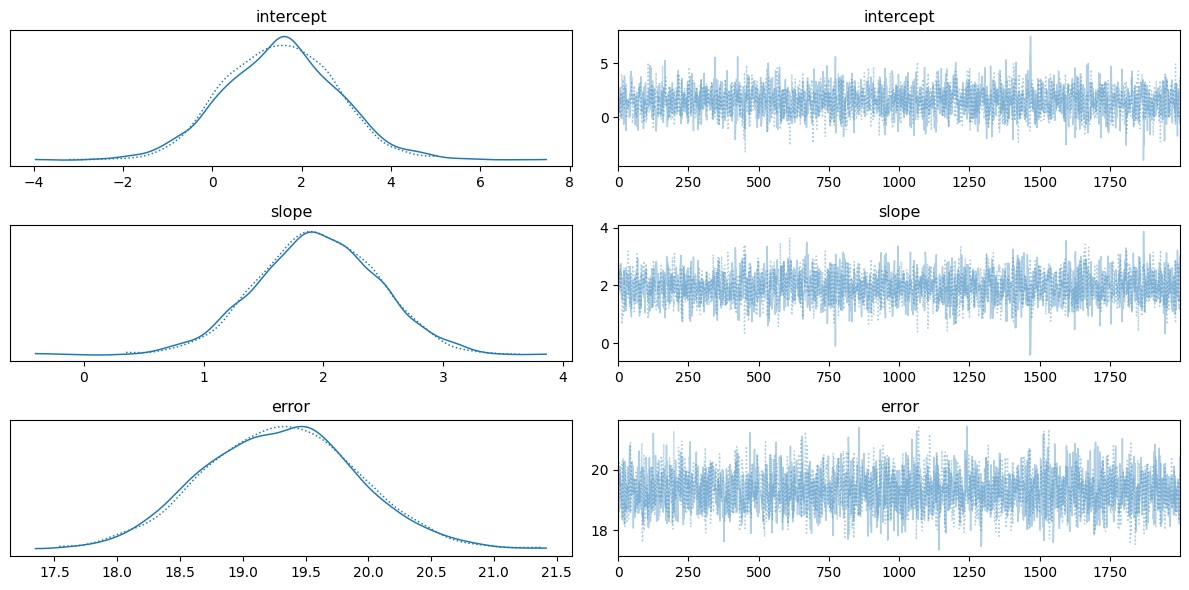

In [449]:
az.plot_trace(trace)
plt.tight_layout()
plt.show()

In [450]:

ppc = pm.sample_posterior_predictive(trace, model=model, extend_inferencedata=True)

Sampling: [obs]


Output()

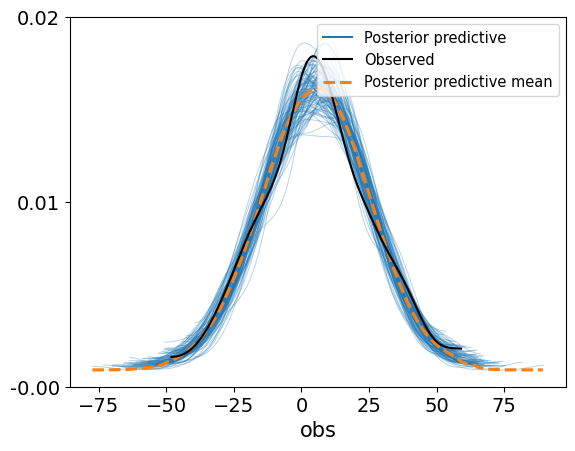

In [451]:
ax = az.plot_ppc(ppc, num_pp_samples=100, alpha=0.3)

# Get the current y-axis limits
y_min, y_max = ax.get_ylim()

# Set y-axis ticks and labels
ax.set_yticks([y_min, (y_min + y_max) / 2, y_max])
ax.set_yticklabels([f"{y_min:.2f}", f"{(y_min + y_max) / 2:.2f}", f"{y_max:.2f}"])

# Show the plot
plt.show()

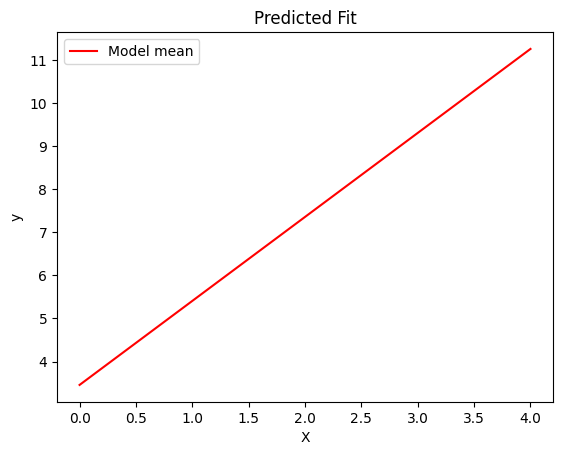

In [452]:
post_mean = az.summary(ppc)['mean']
mean_prediction = (post_mean['intercept'] + post_mean['slope']*X)
plt.plot(mean_prediction, color='r', label='Model mean')

plt.legend()
plt.title('Predicted Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.show()